## Cluster Analysis with Python

The Python code in this Notebook is provided as part of a [Dave on Data](https://www.daveondata.com) webinar on logistic regression with Python.

The data visualizations are built using the mighty [plotnine](https://plotnine.readthedocs.io/en/stable/index.html) library. Instructions for installing plotnine are available [here](https://plotnine.readthedocs.io/en/stable/installation.html).

This code is provided **as-is** for your use. No warranty for this code should be assumed or is implied.

### Load the *Iris* Dataset

The webinar uses the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) available from scikit-learn library.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris_df = load_iris(as_frame = True).data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Loading the *Iris* Dataset - Revisited

The code below illustrates another way to load the *Iris* dataset.

In [2]:
from sklearn.datasets import load_iris

# The load_iris() function returns a bunch object
iris_bunch = load_iris(as_frame = True)

# Get the features of the iris data set
iris_X = iris_bunch.data

iris_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### K-Means with Python

In [3]:
from sklearn.cluster import KMeans

# Perform clustering with three clusters, 25 random starts and
# setting the random seed for reproducibility
k_means = KMeans(n_clusters = 3, n_init = 25, random_state = 54321)

# Cluster only petal legths and petal widths so we can visualize
k_means.fit(iris_X[['petal length (cm)', 'petal width (cm)']])

# Add cluster labels to dataframe
iris_X['label'] = k_means.labels_

# What are the counts by cluster label?
iris_X['label'].value_counts()

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0    52
1    50
2    48
Name: label, dtype: int64

### Visualizing Clusters

The code below uses the mighty *plotnine* library to visualize the clustering of the *Iris* dataset.

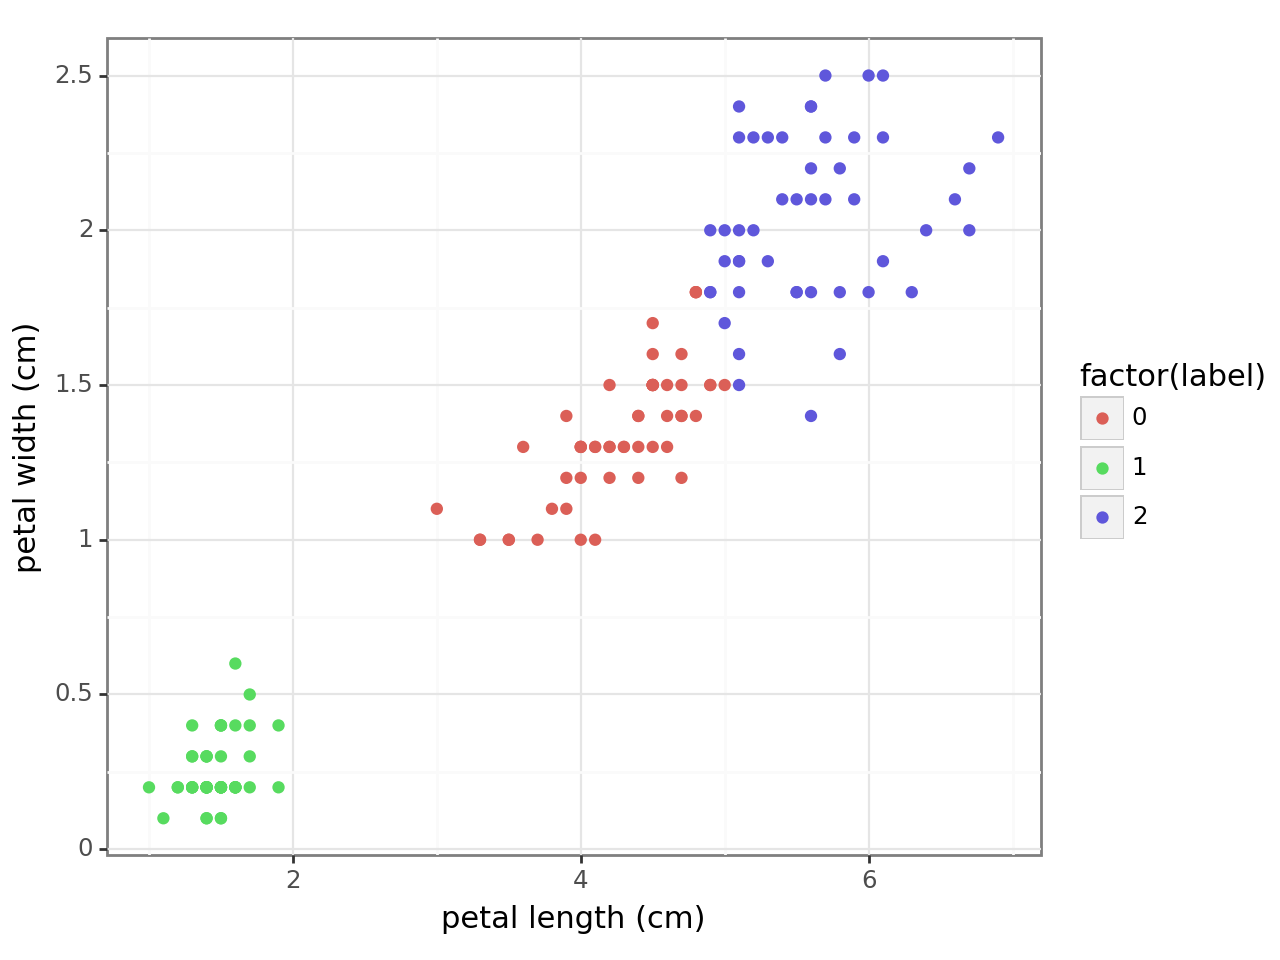

<Figure Size: (640 x 480)>

In [4]:
# Create a visualization of cluster assignments
from plotnine import ggplot, geom_point, aes, theme_bw



(ggplot(iris_X, aes(x = 'petal length (cm)', y = 'petal width (cm)')) +
 theme_bw() + 
 geom_point(aes(color = 'factor(label)')))

### *Iris* Ground Truth

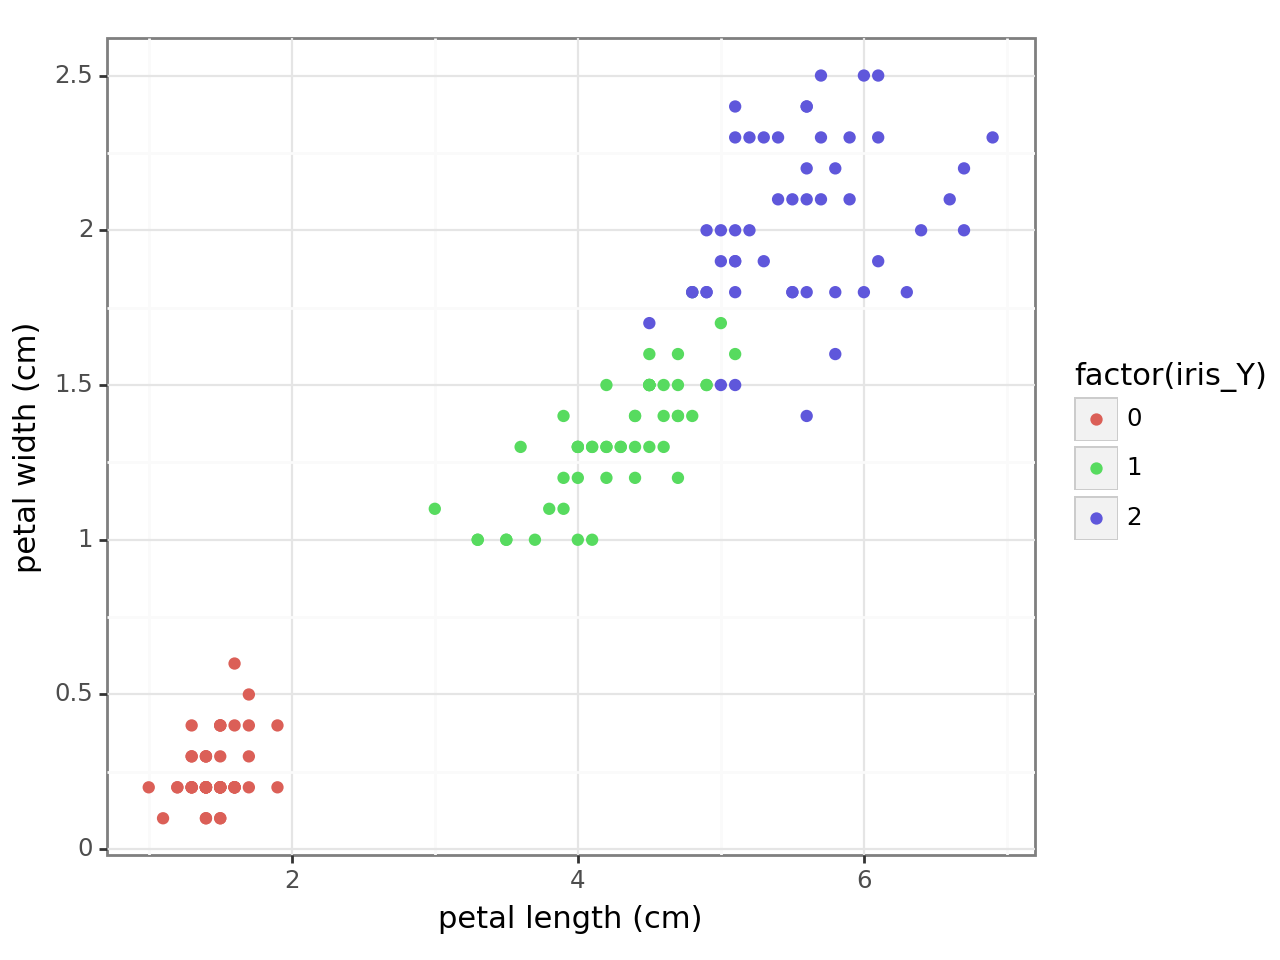

<Figure Size: (640 x 480)>

In [5]:
# Get the actual labels
iris_Y = iris_bunch.target

(ggplot(iris_X, aes(x = 'petal length (cm)', y = 'petal width (cm)')) +
 theme_bw() + 
 geom_point(aes(color = 'factor(iris_Y)')))